In [2]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from umap import UMAP
from sklearn.cluster import KMeans

%config InlineBackend.figure_formats = {'png', 'retina'}
# plt.style.use('dark_background')

/opt/homebrew/anaconda3/envs/embeddings-art/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
folder_names = ['merosu', 'ningenisu', 'sisei']  # 作品名を指定

## 埋め込みをロード

In [4]:
num_of_sentence = []
concat_embeddings = np.empty((0, 1536))

for folder_name in folder_names:
    with open(f'embeddings/{folder_name}/embeddings.pickle', 'rb') as f:
        embeddings = pickle.load(f)
        num_of_sentence.append(embeddings.shape[0])
        concat_embeddings = np.concatenate([concat_embeddings, embeddings])

# UMAPで次元削減

In [5]:
concat_umap = UMAP().fit_transform(concat_embeddings)

# プロット

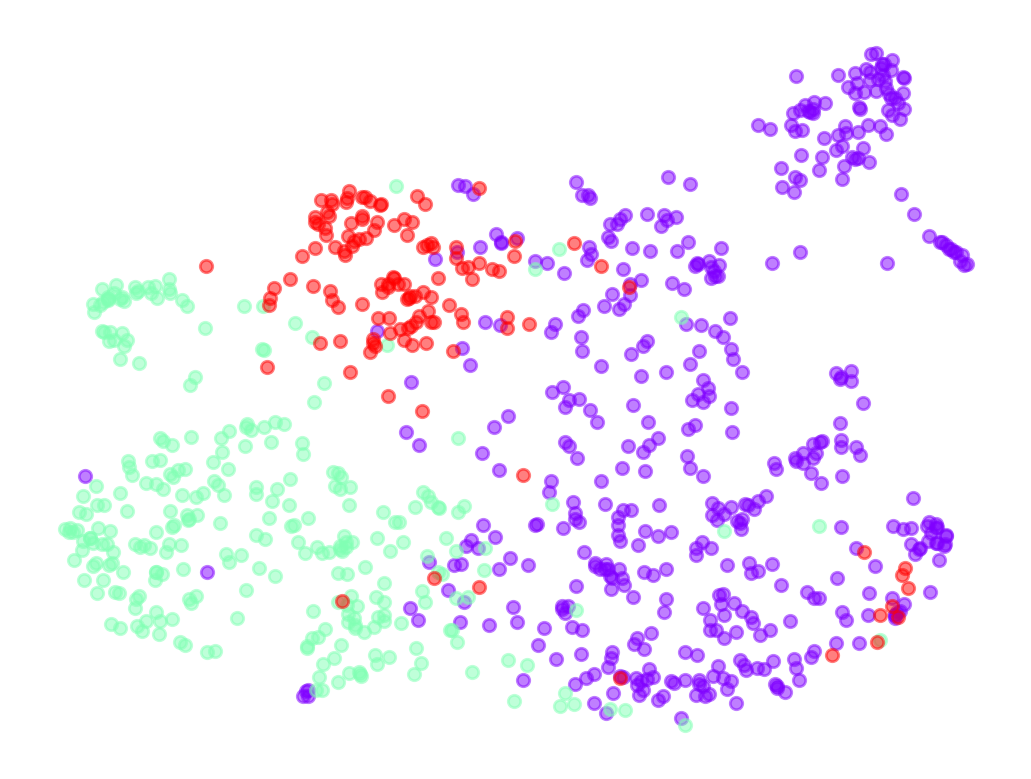

In [6]:
alphas = np.linspace(0.5, 0.5, len(num_of_sentence))
# colors = ['black' for _ in range(len(num_of_sentence))] # マーカの色を全て黒にする
colors = cm.rainbow(np.linspace(0, 1, len(num_of_sentence)))  # マーカーの色を虹色にする
marker_size = 20    # マーカーのサイズ

fig, ax = plt.subplots()
ax.axis('off')

first_novel = concat_umap[:num_of_sentence[0]]
ax.scatter(first_novel[:, 0], first_novel[:, 1], color=colors[0], alpha=alphas[0], s=marker_size)

for i in range(1, len(num_of_sentence)-1):
    i_novel = concat_umap[num_of_sentence[i-1]:num_of_sentence[i-1]+num_of_sentence[i]]
    ax.scatter(i_novel[:, 0], i_novel[:, 1], color=colors[i], alpha=alphas[i], s=marker_size)

last_novel = concat_umap[-num_of_sentence[-1]:]
ax.scatter(last_novel[:, 0], last_novel[:, 1], color=colors[-1], alpha=alphas[-1], s=marker_size)

plt.show()